<a href="https://colab.research.google.com/github/uschauhan-dev/Machine-Learning/blob/main/Autism_Detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving autism_screening.csv to autism_screening (1).csv


In [3]:
df = pd.read_csv("autism_screening.csv")
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,233
Asian,123
?,95
Middle Eastern,92
Black,43
South Asian,36
Others,30
Latino,20
Hispanic,13


In [6]:
df['relation'].value_counts()

,count
relation,
Self,522
?,95
Parent,50
Relative,28
Others,5
Health care professional,4


In [7]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

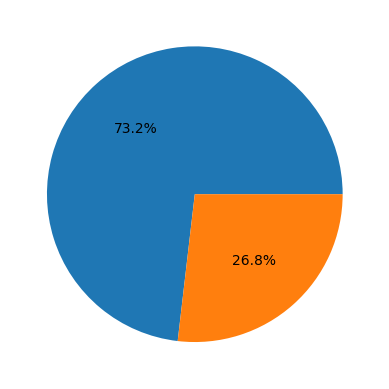

In [8]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [9]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

print("Int columns:", ints)
print("Object columns:", objects)
print("Float columns:", floats)

Int columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jundice', 'austim', 'used_app_before']
Object columns: ['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation', 'Class/ASD']
Float columns: ['age', 'result']


In [10]:
if 'ID' in ints:
    ints.remove('ID')
if 'Class/ASD' in ints:
    ints.remove('Class/ASD')

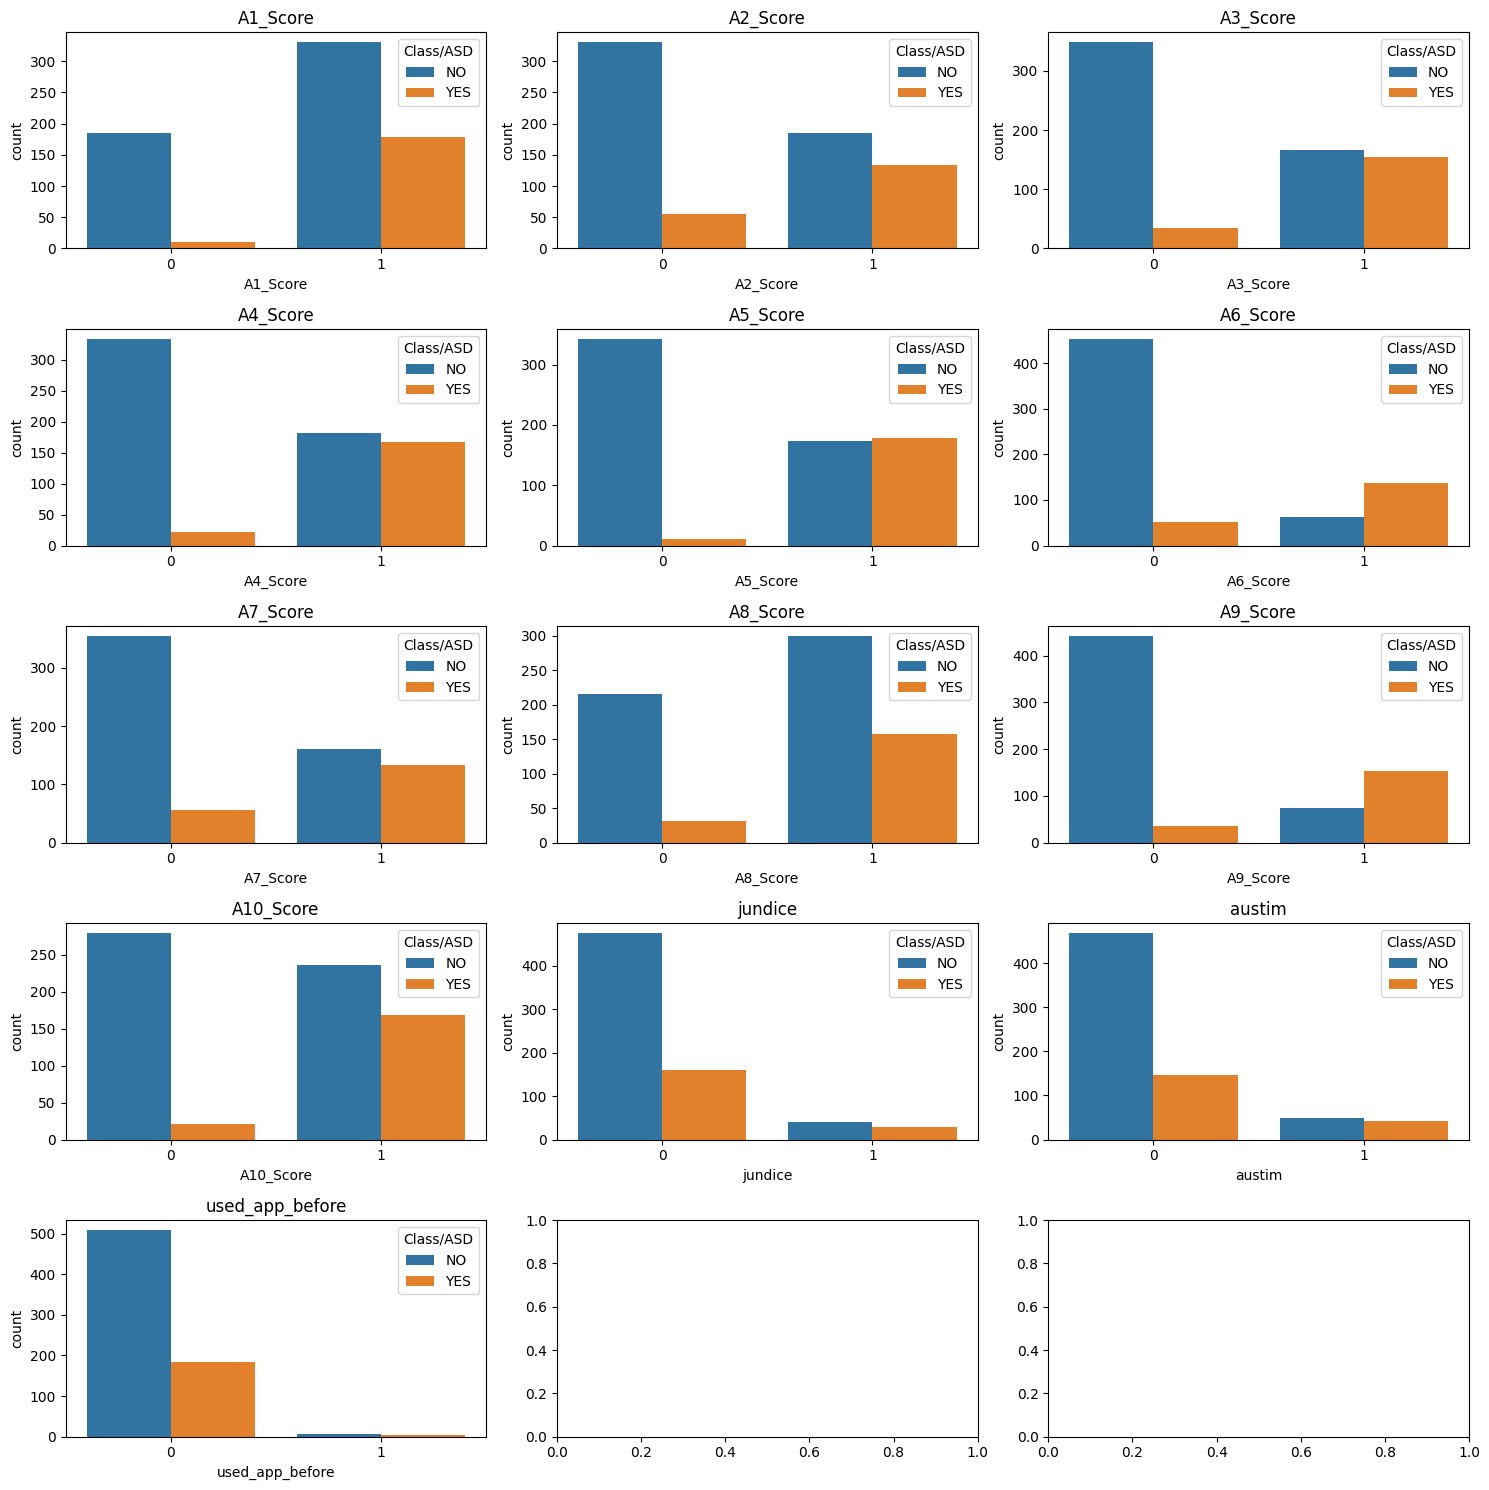

In [11]:
%matplotlib inline
import math

n_plots = len(ints)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

for i, col in enumerate(ints):
    row = i // n_cols
    col_idx = i % n_cols
    axs[row, col_idx].set_title(col)
    sb.countplot(x=df[col], hue=df['Class/ASD'], ax=axs[row, col_idx])

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 15, not 16

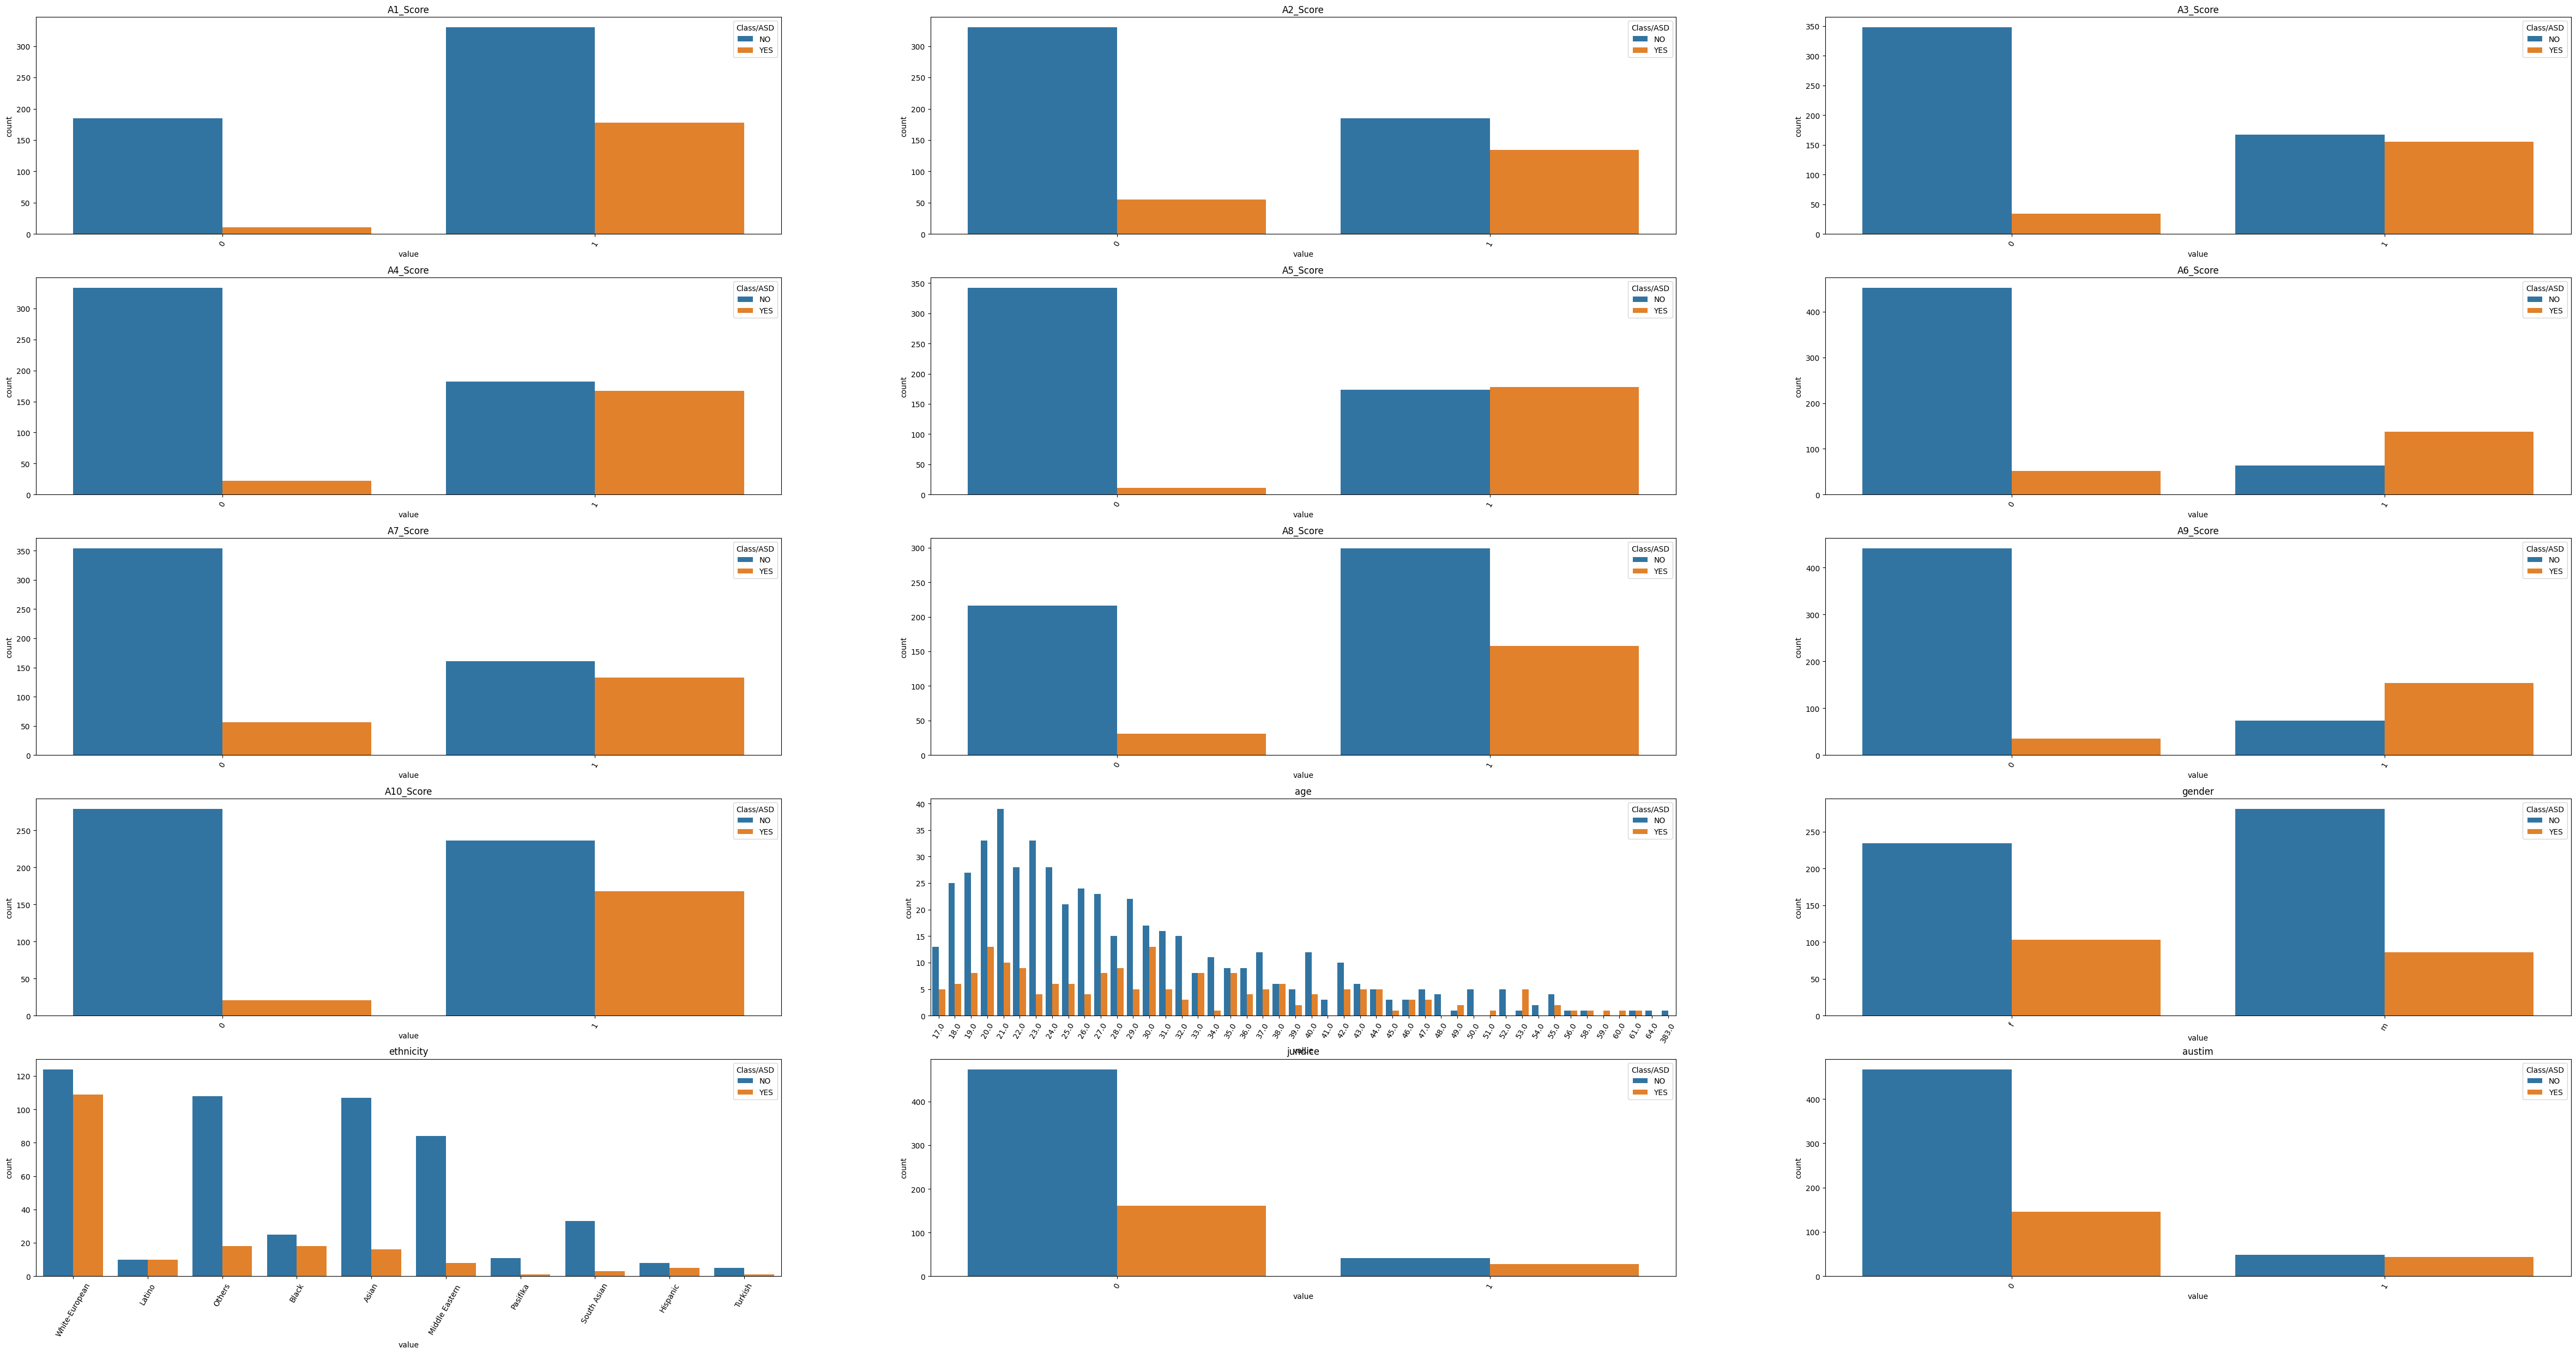

In [12]:
objects = list(df.columns)
objects.remove('Class/ASD')  # remove 'Class/ASD' from the objects list

plt.subplots(figsize=(60, 30))

for i, col in enumerate(objects):
    melted_df = pd.melt(df, id_vars='Class/ASD', value_vars=[col])
    plt.subplot(5, 3, i+1)
    sb.countplot(x='value', hue='Class/ASD', data=melted_df)
    plt.title(col)
    plt.subplot(5, 3, i+1).xaxis.set_tick_params(rotation=60)

plt.tight_layout()
plt.show()

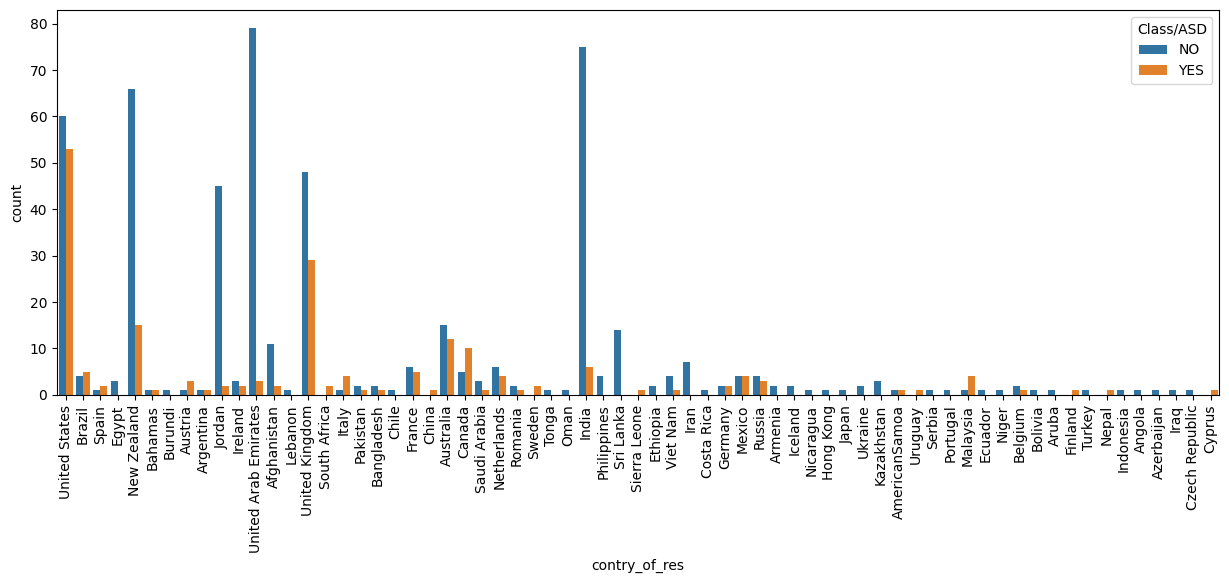

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
df = pd.read_csv("autism_screening.csv")
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

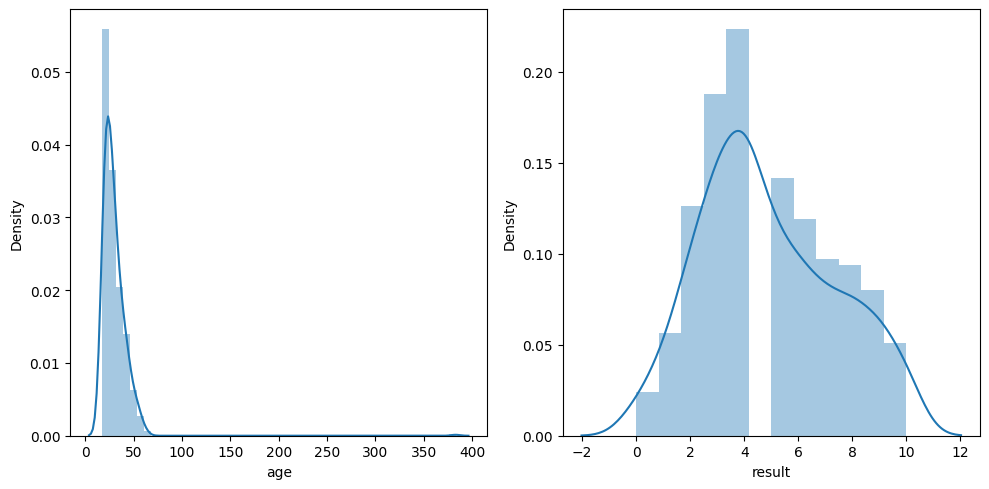

In [14]:
plt.subplots(figsize=(10,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])

plt.tight_layout()
plt.show()

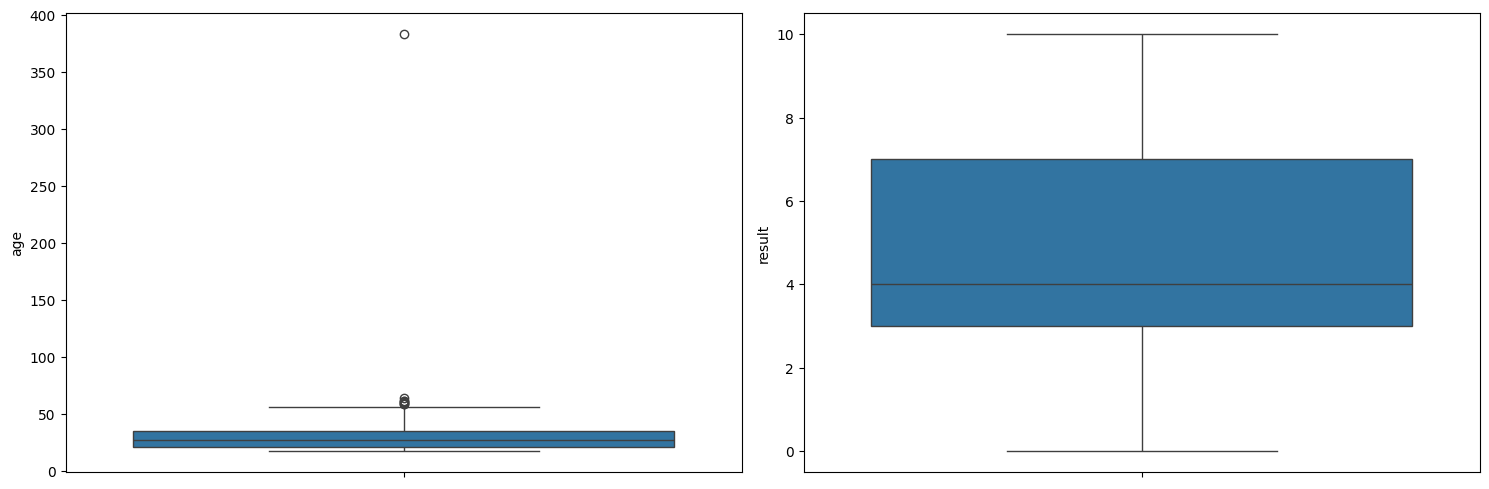

In [15]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
 plt.subplot(1,2,i+1)
 sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [16]:
df = df[df['result']>-5]
df.shape

(704, 21)

In [17]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

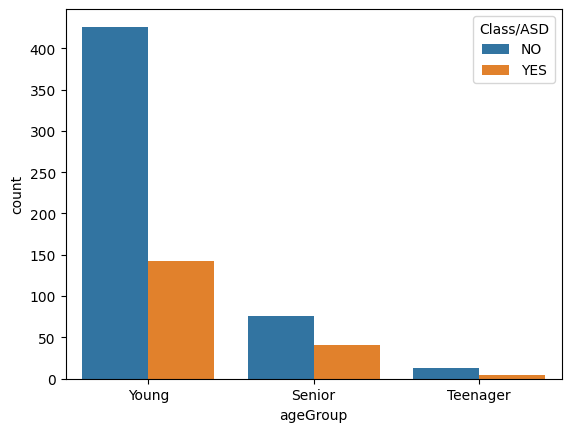

In [18]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [22]:
def add_feature(data):

# Creating a column with all values zero
 data['sum_score'] = 0
 for col in data.loc[:,'A1_Score':'A10_Score'].columns:

	# Updating the 'sum_score' value with scores
	# from A1 to A10
	 data['sum_score'] += data[col]

# Creating a random data using the below three columns
 data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']

 return data

df = add_feature(df)

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score,ind
0,1,1,1,1,0,0,1,1,0,0,...,no,United States,no,6.0,18 and more,Self,NO,Young,6,nonono
1,1,1,0,1,0,0,0,1,0,1,...,yes,Brazil,no,5.0,18 and more,Self,NO,Young,5,yesnono
2,1,1,0,1,1,0,1,1,1,1,...,yes,Spain,no,8.0,18 and more,Parent,YES,Young,8,yesnoyes
3,1,1,0,1,0,0,1,1,0,1,...,yes,United States,no,6.0,18 and more,Self,NO,Young,6,yesnono
4,1,0,0,0,0,0,0,1,0,0,...,no,Egypt,no,2.0,18 and more,?,NO,Senior,2,nonono


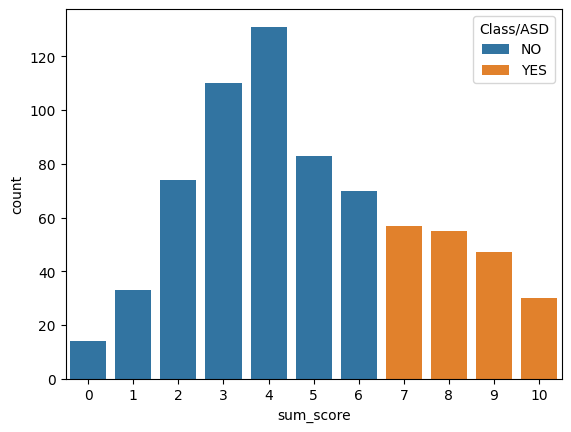

In [23]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [24]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

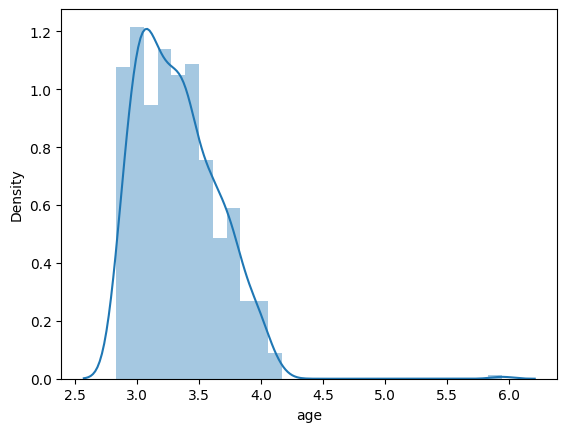

In [25]:
sb.distplot(df['age'])
plt.show()

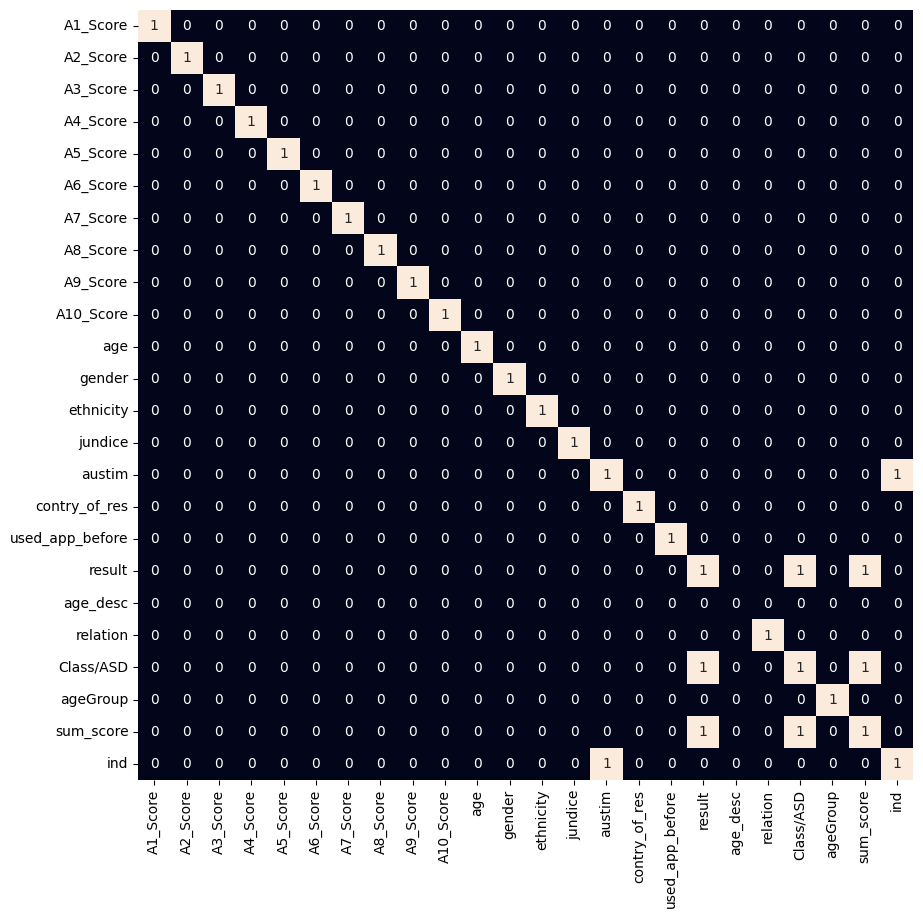

In [26]:
def encode_labels(data):
	for col in data.columns:

	# Here we will check if datatype
	# is object then we will encode it
	 if data[col].dtype == 'object':
		 le = LabelEncoder()
		 data[col] = le.fit_transform(data[col])

	return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [27]:
removal = ['age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((820, 20), (820,))

In [29]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)
  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()

LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9765873015873017



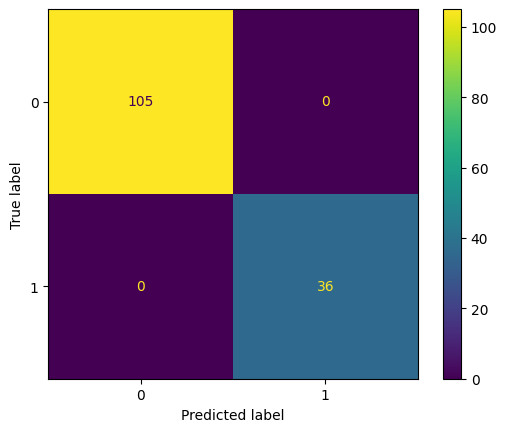

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = models[0]
y_pred = model.predict(X_val)

cm = confusion_matrix(Y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()